In [6]:
L = 160000; #時間発展の回数

In [7]:
function pprocess_poisson(μ, ε)
    dt = 1 #1時間ステップ
    xs = [0.0]; #初期値、xsは発火時系列
    
    t = 1.0; #時刻
    ts = [1.0]; #イベントの発生した時間の記録

    while t <= L*dt
        t = t + dt;
        m = sum(1/(t-ti) for ti in ts);
        p = 1-exp(-μ*m-ε);
        if rand() <= p
            push!(ts, t)
        end
    end
    return ts

end

pprocess_poisson (generic function with 1 method)

In [3]:
pp_row = pprocess_poisson(0.1,0.02)

44751-element Array{Float64,1}:
      1.0
      7.0
     25.0
     44.0
     45.0
     82.0
    103.0
    104.0
    147.0
    148.0
    259.0
    346.0
    402.0
      ⋮  
 159967.0
 159968.0
 159971.0
 159972.0
 159973.0
 159980.0
 159981.0
 159982.0
 159985.0
 159994.0
 159996.0
 159997.0

In [8]:
function pprocess_poisson(μ, ε)
    dt = 1 #1時間ステップ
    xs = [0.0]; #初期値、xsは発火時系列
    
    t = 1.0; #時刻
    ts = [1.0]; #イベントの発生した時間の記録

    while t <= L*dt
        t = t + dt;
        m = sum(1/(t-ti) for ti in ts);
        p = 1-exp(-μ*m-ε);
        if rand() <= p
            push!(ts, t)
        end
    end
#    return ts

    i = 1;
    τ_a = [];
    while i <= length(ts) -1
            τ = ts[i+1] - ts[i]
        push!(τ_a, τ); 
        i = i + 1
    end
    
    return sort!(τ_a)
end

pprocess_poisson (generic function with 1 method)

In [9]:
τ = pprocess_poisson(0.12,0.006)

71320-element Array{Any,1}:
   1.0
   1.0
   1.0
   1.0
   1.0
   1.0
   1.0
   1.0
   1.0
   1.0
   1.0
   1.0
   1.0
   ⋮  
  74.0
  81.0
  85.0
  88.0
  98.0
 122.0
 123.0
 136.0
 172.0
 183.0
 186.0
 258.0

In [10]:
τ

71320-element Array{Any,1}:
   1.0
   1.0
   1.0
   1.0
   1.0
   1.0
   1.0
   1.0
   1.0
   1.0
   1.0
   1.0
   1.0
   ⋮  
  74.0
  81.0
  85.0
  88.0
  98.0
 122.0
 123.0
 136.0
 172.0
 183.0
 186.0
 258.0

In [11]:
using PyPlot
ioff() 

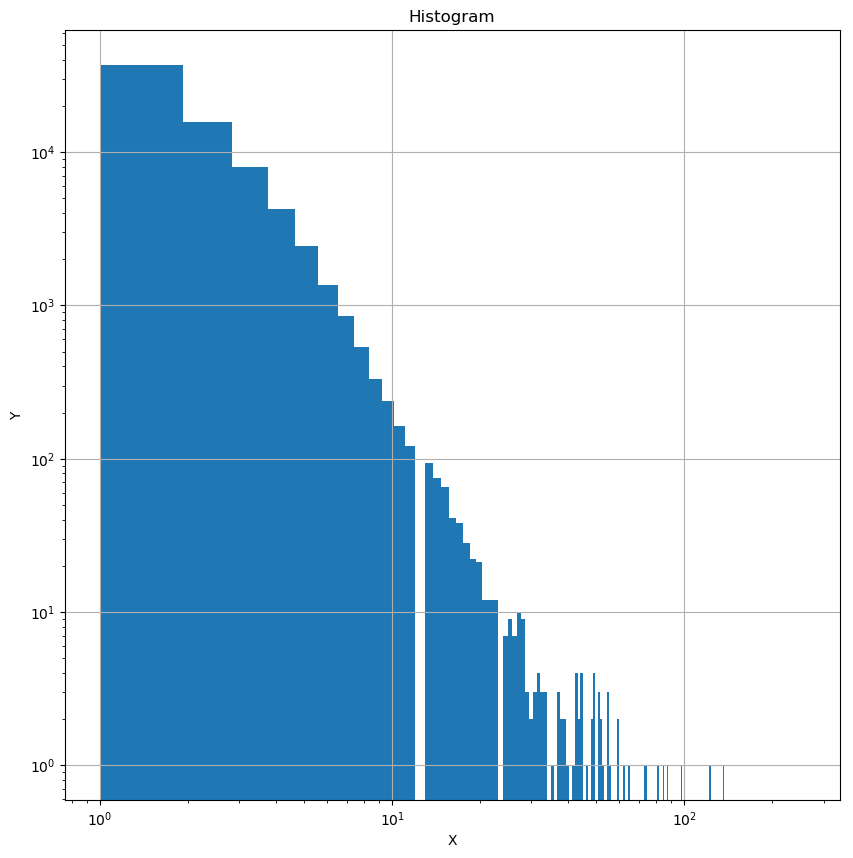

/Users/takeuchimakoto/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


PyObject Text(0.5,1,'Histogram')

In [12]:
##########
#  Plot  #
nbins = 280; # Number of bins

fig = figure("pyplot_histogram",figsize=(10,10)) # Not strictly required
ax = axes() # Not strictly required
h = plt[:hist](τ,nbins) # Histogram

xscale("log")
yscale("log")

#xlim(0,120)
#ylim(0,10^7)

grid("on")
xlabel("X")
ylabel("Y")
title("Histogram")
#gcf() # Needed for IJulia to plot inline

In [1]:
i = 1
expx = []
    while i <= 100
    push!(expx, i); 
        i = i + 1
    end
expx

100-element Array{Any,1}:
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10
  11
  12
  13
   ⋮
  89
  90
  91
  92
  93
  94
  95
  96
  97
  98
  99
 100

In [79]:
expy = 13^5 * exp.(-1 * expx)

100-element Array{Float64,1}:
     1.36591e5  
 50249.0        
 18485.6        
  6800.47       
  2501.75       
   920.343      
   338.575      
   124.555      
    45.8212     
    16.8567     
     6.20122    
     2.2813     
     0.839244   
     ⋮          
     8.27004e-34
     3.04238e-34
     1.11923e-34
     4.11741e-35
     1.51471e-35
     5.57231e-36
     2.04994e-36
     7.5413e-37 
     2.77429e-37
     1.0206e-37 
     3.75459e-38
     1.38124e-38

In [73]:
power_lawy = 12^5 * (expx*1.0).^-3.1

100-element Array{Float64,1}:
 248832.0     
  29021.1     
   8257.15    
   3384.7     
   1694.72    
    963.025   
    597.176   
    394.755   
    274.002   
    197.654   
    147.092   
    112.317   
     87.6359  
      ⋮       
      0.225319
      0.217648
      0.210319
      0.203312
      0.196612
      0.1902  
      0.184062
      0.178183
      0.17255 
      0.16715 
      0.161971
      0.157002

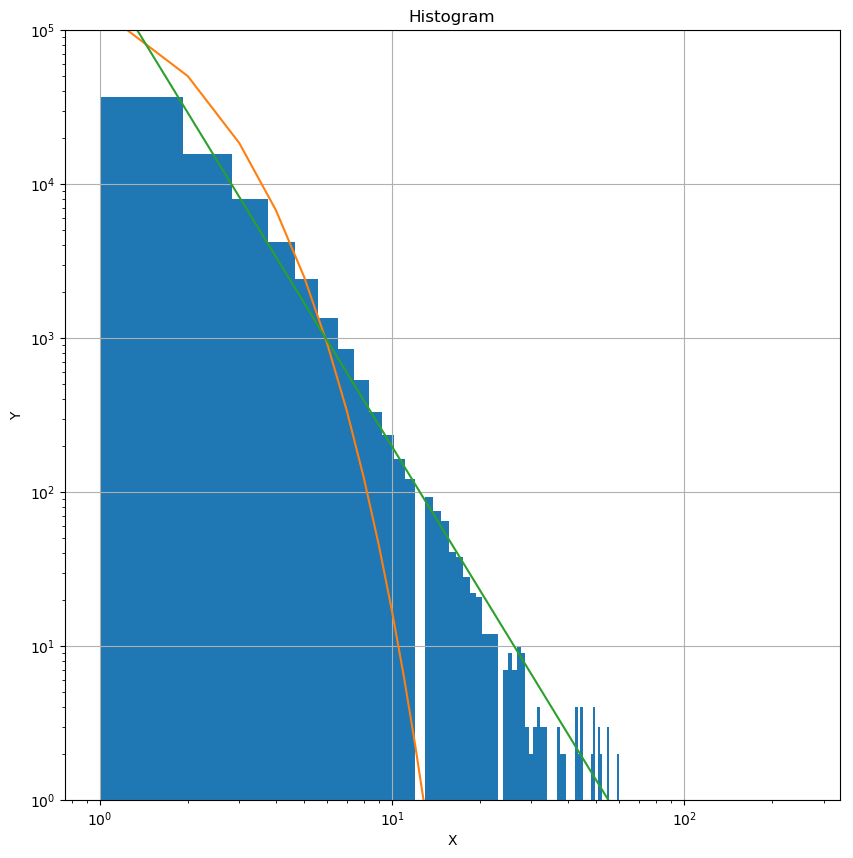

PyObject Text(0.5,1,'Histogram')

In [80]:
##########
#  Plot  #
nbins = 280; # Number of bins

fig = figure("pyplot_histogram",figsize=(10,10)) # Not strictly required
ax = axes() # Not strictly required
h = plt[:hist](τ,nbins) # Histogram
exp_plt = plt[:plot](expx, expy)
power_law_plt = plt[:plot](expx, power_lawy)

xscale("log")
yscale("log")

#xlim(0,120)
ylim(1,10^5)

grid("on")
xlabel("X")
ylabel("Y")
title("Histogram")
#gcf() # Needed for IJulia to plot inline

100-element Array{Any,1}:
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10
  11
  12
  13
   ⋮
  89
  90
  91
  92
  93
  94
  95
  96
  97
  98
  99
 100

In [12]:
expm(x[1])

2.718281828459045

In [13]:
y = []
i = 1
yx = 0
while  i <= length(x)
    yx = expm(0.1*x[i])
    push!(y, yx); 
    i = 1 + i
end

In [84]:
y

100-element Array{Any,1}:
     1.10517
     1.2214 
     1.34986
     1.49182
     1.64872
     1.82212
     2.01375
     2.22554
     2.4596 
     2.71828
     3.00417
     3.32012
     3.6693 
     ⋮      
  7331.97   
  8103.08   
  8955.29   
  9897.13   
 10938.0    
 12088.4    
 13359.7    
 14764.8    
 16317.6    
 18033.7    
 19930.4    
 22026.5    

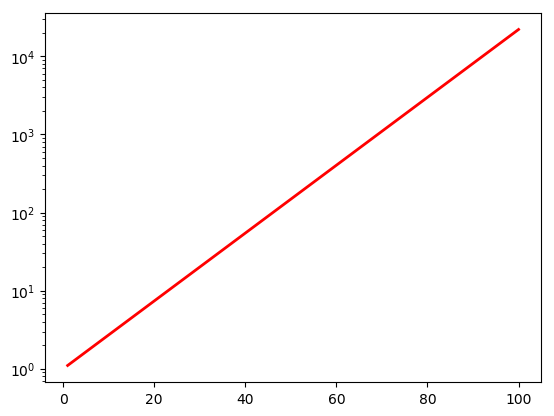

In [14]:
#using PyPlot
plt[:plot](x, y, color="red", linewidth=2.0, linestyle="-")
yscale("log")